# Mobile Price Classification

The goal of this project is to develop a machine learning model that can classify mobile phone prices into different categories based on their features. By using this model, users will be able to predict the price range of a mobile phone based on its specifications, helping them make informed decisions while purchasing a new phone.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataframe = pd.read_csv('mobileprice.csv')

# Data Processing

Data preprocessing plays a crucial role in the success of any machine learning project, including mobile price classification.

In [4]:
dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
dataframe.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
dataframe.shape

(2000, 21)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
dataframe.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [9]:
dataframe.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Statical Info

In addition to data processing, it is important to gather statistical information about the dataset to gain insights and understand the characteristics of the mobile phone prices. 

In [10]:
dataframe.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Correlation Matrix


A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. In the context of the mobile price classification project, a correlation matrix can provide insights into the relationships between different mobile phone features and their impact on prices.

In [11]:
corr_matrix = dataframe.corr()

In [12]:
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

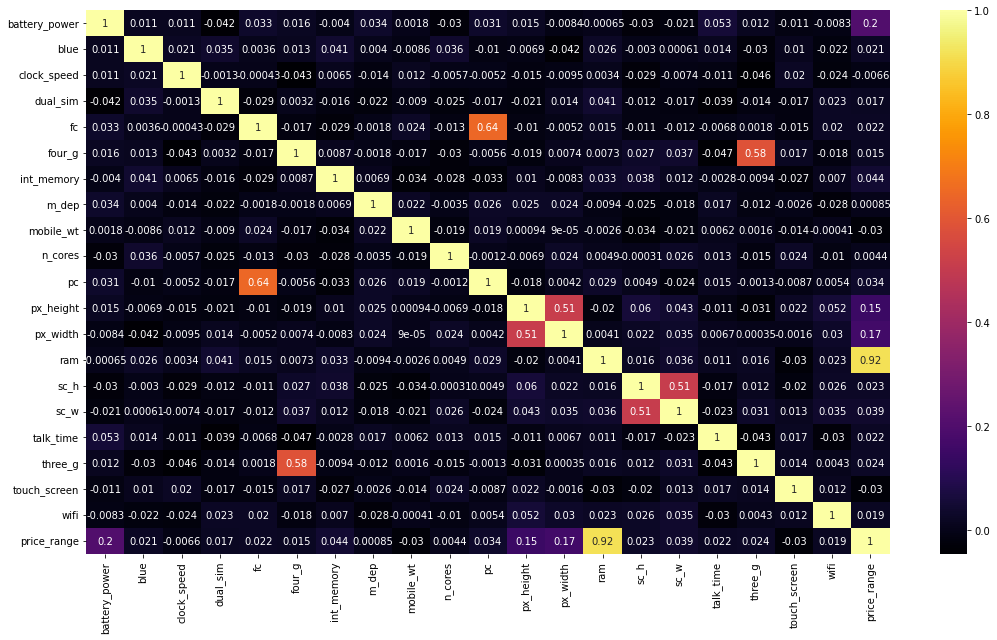

In [15]:
plt.figure(figsize = (18, 10))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

In [16]:
dataframe.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Correlation Of Price Range 

In [17]:
dataset = dataframe.drop('price_range', axis = 1)

In [18]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


<AxesSubplot:title={'center':'Correlation Of Price'}>

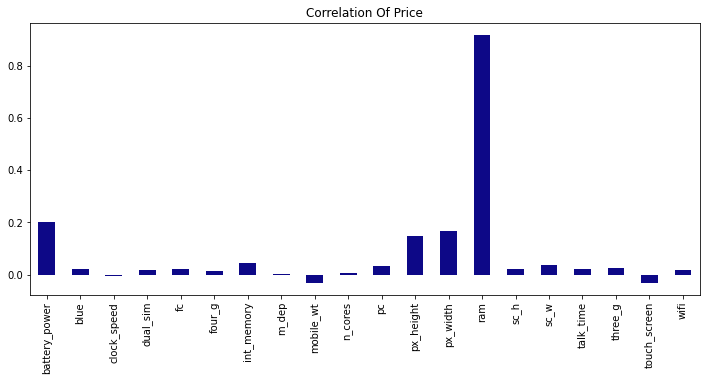

In [20]:
dataset.corrwith(dataframe['price_range']).plot.bar(
    figsize = (12, 5),
    title = 'Correlation Of Price', 
    cmap = 'plasma'
)

In [21]:
dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Scaling

Scaling is an important preprocessing step in machine learning that aims to normalize the range of numerical features in the dataset. In the context of the mobile price classification project, scaling ensures that all the features contribute equally to the model training process.

In [23]:
x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In [24]:
x.shape, y.shape

((2000, 20), (2000,))

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x = scaler.fit_transform(x)

# Splitting Dataset


Splitting the dataset is an essential step in machine learning to evaluate and validate the performance of the model. In the context of the mobile price classification project, you need to divide the dataset into training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 41)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()

In [33]:
log.fit(x_train, y_train)

LogisticRegression()

# Prediction On x-Test 

In [34]:
y_pred = log.predict(x_test)

In [35]:
y_pred

array([1, 2, 2, 3, 2, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2,
       3, 1, 3, 2, 1, 0, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 0, 3, 2, 0, 2, 3,
       1, 1, 0, 1, 1, 0, 2, 0, 2, 3, 0, 3, 1, 3, 3, 3, 0, 3, 2, 0, 3, 2,
       0, 2, 3, 1, 3, 0, 1, 0, 3, 3, 0, 2, 2, 3, 0, 1, 0, 2, 1, 1, 1, 3,
       2, 0, 2, 3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 1, 2, 2, 0, 1, 0, 1, 2, 3,
       2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 1, 0, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 2, 2, 3, 2, 3,
       2, 0, 2, 3, 3, 1, 3, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 3, 3,
       1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 3, 2, 3, 3, 0, 1,
       0, 1, 0, 3, 3, 3, 1, 0, 2, 1, 0, 2, 1, 1, 3, 0, 1, 2, 3, 1, 0, 2,
       3, 2, 2, 0, 0, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 3, 3, 0, 0, 1,
       0, 3, 0, 2, 2, 3, 1, 2, 2, 1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 3, 3, 1,
       3, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1, 2, 1, 2,

In [36]:
print(y_test[20]), print(y_pred[20])

2
2


(None, None)

# Error Analysis

Error analysis is a crucial step in machine learning projects, including the mobile price classification project, to gain insights into the model's performance, identify sources of errors, and determine areas for improvement.

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
accuracy_score = accuracy_score(y_test, y_pred)

In [39]:
accuracy_score

0.97

In [40]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [41]:
confusion_matrix

array([[ 96,   0,   0,   0],
       [  3,  93,   3,   0],
       [  0,   3,  95,   1],
       [  0,   0,   2, 104]], dtype=int64)

<AxesSubplot:>

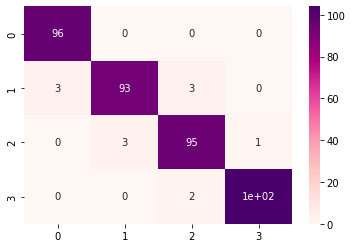

In [42]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       0.97      0.94      0.95        99
           2       0.95      0.96      0.95        99
           3       0.99      0.98      0.99       106

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Thanks !